In [275]:
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

import requests
import pandas as pd
import govcxanalyzer.data_preprocessing as dp
from govcxanalyzer import eda
from govcxanalyzer import utils
import govcxanalyzer.hypothesis_testing as ht
import numpy as np

tp = utils.get_date_timestamp()

print(tp)
import time


mergedcxdata = dp.load_data("../data/mergedcxdata-2023-05-21.csv")
mergedcxdata = mergedcxdata.rename(columns={col: col.replace("attributes_", "") for col in list(mergedcxdata.columns)})

idcols = [col for col in mergedcxdata.columns if col.endswith("id")]
dp.make_categorical_subset(mergedcxdata).sample(2)



2023-08-27_18:31:59
Index(['type', 'organization_name', 'organization_abbreviation',
       'service_provider_name', 'collection_name', 'service_provided',
       'transaction_point', 'channel', 'omb_control_number',
       'federal_register_url', 'q1_text', 'q2_text', 'q3_text', 'q4_text',
       'q5_text', 'q6_text', 'q7_text', 'q8_text', 'q9_text', 'q10_text',
       'q11_text', 'created_at', 'updated_at', 'operational_metrics',
       'service_name', 'service_slug', 'service_desc',
       'service_provider_desc'],
      dtype='object')


type               organization_name  \
59   omb_cx_reporting_collections  Department of Veterans Affairs   
349  omb_cx_reporting_collections             Department of Labor   

    organization_abbreviation                     service_provider_name  \
59                         VA          Veterans Benefits Administration   
349                       DOL  Office of Workers' Compensation Programs   

            collection_name  \
59   CX Quarterly Reporting   
349  CX Quarterly Reporting   

                                      service_provided  \
59            VBA Education Service Receiving Benefits   
349  DEEOIC works with Authorized Representatives w...   

                                     transaction_point channel  \
59   CX data is collected using an online transacti...   email   
349  Recently (last 6 months) served as an Authoriz...   paper   

     omb_control_number                               federal_register_url  \
59            2900-0770  https://www.reginfo.gov/public/do/PRAViewIC?re...   
349  OMB Control Number                               Federal Register URL   

     ... q9_text q10_text q11_text                created_at  \
59   ...     NaN      NaN      NaN  2021-06-23T04:56:55.728Z   
349  ...     NaN      NaN      NaN  2022-07-27T16:37:42.983Z   

                   updated_at operational_metrics  \
59   2021-08-04T19:43:23.655Z                 NaN   
349  2022-07-27T16:41:55.569Z          CX Drivers   

                                          service_name service_slug  \
59   Contacting the Benefits Administration contact...       va-vba   
349    Applying for compensation benefits under EEOICP          NaN   

                                          service_desc  \
59   VBA sends surveys to those who interact with i...   
349  The Energy Employees Occupational Illness Comp...   

                                 service_provider_desc  
59   The Veterans Benefits Administration (VBA) ser...  
349  The Office of Workers' Compensation Programs (...  

[2 rows x 28 columns]

In [302]:
example_survey_df =pd.read_csv("../data/example-hisp-touchpoints-survey-drivers-cats.csv")

idcols =  ['ID', 'UUID']

additional_cols = ['Created At', "Page", "Referrer", 
"User Agent"]

drivers2questions = {
    'Satisfaction': 'I am satisfied with the service I received from [service]',
 'Trust/Confidence': 'This interaction increased my confidence in [service provider]',
 'Effectiveness/Quality': 'My need was addressed.',
  'UserGroup': "Which best describes you?",
 "Years": "How many years have you been enrolled?",
 'Region': "Which region are you in?",
 'Ease/Simplicity': 'It was easy to complete what I needed to do.',
 'Efficiency/Speed': 'It took a reasonable amount of time to do what I needed to do.',
 'Equity/Transparency': "I understood what was being asked of me throughout the process.",
 'Helpfulness': 'The [service] helped me do what I needed to do.',
 "FreeText": "Please share any additional feedback you have about your experience with [service].",
 }



In [303]:


example_survey_df.sample(2)

ID            UUID  Satisfaction  Trust/Confidence  \
628  2023-08-27_17:35:06-629  df2e502c-aede-             4                 4   
179  2023-08-27_17:35:06-180  84c93dbc-32c8-             4                 4   

     Effectiveness/Quality UserGroup      Years   Region  Ease/Simplicity  \
628                      4    Group4  3-4 years  Region4                4   
179                      4    Group4  2-3 years  Region3                3   

     Efficiency/Speed  Equity/Transparency  Helpfulness  FreeText  \
628                 3                    3            3       NaN   
179                 3                    3            3       NaN   

                  Created At       Page                       Referrer  \
628  2022-08-20 21:14:50 UTC  /contact/          https://beepbeep.gov/   
179  2022-04-19 14:45:40 UTC  /contact/  https://catalog.beepbeep.gov/   

                                            User Agent  
628  Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...  
179  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...

In [304]:
mergedcxdata[mergedcxdata["organization_abbreviation"]=="OPM"][['organization_abbreviation',
       'service_provider_name','service_provided',
       'transaction_point', 'channel', 
 'q1_text', 'q2_text', 'q3_text', 'q4_text',
       'q5_text', 'q6_text', 'q7_text', 'q8_text', 'created_at', 'updated_at', 'operational_metrics',
       'service_name', 'service_slug', 'service_desc',
       'service_provider_desc']].drop_duplicates().loc[5].to_dict()
 
 


{'organization_abbreviation': 'OPM',
 'service_provider_name': 'Federal Employment Services',
 'service_provided': 'USAJOBS Job Seeker Portal',
 'transaction_point': 'Visit three or more screens on the website',
 'channel': 'computer',
 'q1_text': 'I am satisfied with the service I received from USA JOBS.',
 'q2_text': 'This interaction increased my confidence in USA JOBS.',
 'q3_text': 'My need was addressed. ',
 'q4_text': 'It was easy to complete what I needed to do.',
 'q5_text': 'It took a reasonable amount of time to do what I needed to do.',
 'q6_text': 'I was easily able to access the website on my device.',
 'q7_text': 'The website helped me do what I needed to do.',
 'q8_text': nan,
 'created_at': '2021-05-14T06:26:51.372Z',
 'updated_at': '2021-08-04T19:48:20.440Z',
 'operational_metrics': nan,
 'service_name': 'Applying to Federal job opportunities',
 'service_slug': 'opm-fes',
 'service_desc': 'U.S. citizens seeking a Federal employment opportunity include students graduat

In [278]:
 freetext = ['I was able to easily find what I was looking for.',
 'The information was not very useful.', "I had hoped for a more robust sample reports section, ideally  real life examplesfrom many fields."
 'Great website filled with valuable help', 'the staff is so helpful...thank you !!!', 'lova yall!', 'cool',
  'please improve your site so i can use it', 'there is some broken urls', 'old information', 
 'The website was pretty easy to navigate.', 'this app makes me sad and takes so much time\n',
 'no.', 'Keep up the good work 🙂',
 "More options pelase",  None, None, None, None, 
  "I couldn't even finsh what I wanted to do", 
 "i'm a senior sitizen and this site is very hard to navigate",
 'bad website', "poorly designed", 'no everything is ok',
 'Keep up the changes to the api',
 'information is not easy to find',
   'Yes, I love your website, you should start to make even more pretty next time. But that looks good to me.',
 'has experience in logistics field.', 'hisp teams conducting our visits was good',
 'to work with hisp was good',
 'the entire process went very smoothly. No issues whatsoever was good',
 'The process process was good',
 'the resources before the service day',
 'working with all of the hisp employees was a great experience',
 'Good Communication from the call center team ',
 "to work with the industry partners  is alwqays a pleasure",
 'dealing with hisp was okay',
 'phone attendant was good to talk to ',
 'hybrid the service experience would be nice',
 'working with the the service team wa surprisingly s good',
 'It felt like a collaborative effort',
 'Much transparency was good', None, None, None, None,
 'feedback from the team was good',
 'the process and interaction was good',
 'Communication between groups was good',
 'The phone call was not good',
 'The application process was good', None,
 'The visit team was good',None, None, None,
 'Everyone is super helpful was good',
 'each day was well organized and very productive was good',
 'The Team was very helpful and anxious to learn as well as teach was nice',
 'ALL ppl from the staff attendant to the more senior folks were very supportive was good',
 'opportunity to have the conversations with such qualified professionals was good',
 'took almost a year for a response. was frustrating',
 'to receive our letter of approval took an extended amount of time',
 "information were not the same across various state and govt",
 'There seemed to be a significant lag time between the site visit (February) and the notification of process was frustrating',
 'The application dismissal was frustrating',  'one of the worse services i have every used',
 'not a nice experience', 'very rude interaction',
'Excellent website! consider this..', 'Its nice website']






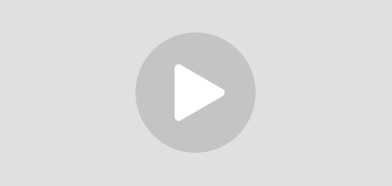
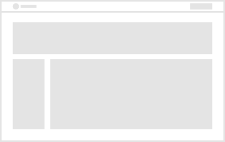
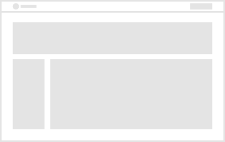

In [284]:

import requests
from bs4 import BeautifulSoup


base_url = "https://www.sitejabber.com/reviews/"

urls2get = ["usajobs.gov", "cdc.gov","ed.gov", "treasurydirect.gov"]

def get_soup_from_revies(url_):
    
    reviews = requests.get(url_)
    
    soup = BeautifulSoup(reviews.text)
    return soup

    
soupl = []

for ur_ in urls2get:
    soup = get_soup_from_revies(f"{base_url}{ur_}")
    
    soupl.append(soup)




In [309]:
soup.find_all("div")

[<div id="fb-root"></div>,
 <div class="header__top container">
 <i aria-label="Open navigation bar" class="custom-icon-paragraph-justify3 header__nav-toggle" role="button" tabindex="0"></i>
 <i aria-label="Open search box" class="custom-icon-search header__search-toggle" role="button" tabindex="0"></i>
 <a class="header__logo" href="https://www.sitejabber.com"><img alt="Sitejabber Website Reviews and Complaints" class="header__logo__image" height="35" src="https://static.sitejabber.com/img/branding/logo_light.1692287721.svg" width="163"/></a>
 <div class="header__search search-form" id="header__search">
 <form action="/search" class="form header__search__form search-form__form" id="header__search__form" method="GET" name="glb_search" target="_top">
 <input aria-label="Search businesses by keyword" class="header__search__keyword search-form__keyword form__input" id="keyword" name="keyword" placeholder="Enter a website, business, or keyword" required="" tabindex="0" type="text" value=""

ExpatError: not well-formed (invalid token): line 38, column 116

In [71]:
mergedcxdata["service_desc"].map(lambda x: np.unique(utils.get_match(str(x).lower(), ["website", "phone", "computer", "digital", "search"])))

NameError: name 'np' is not defined

'<!DOCTYPE html>\n<html lang="en" prefix="fb: http://www.facebook.com/2008/fbml#">\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# business: http://ogp.me/ns/business#">\n\t<meta charset="utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=1">\n\t\n\n\t\t<title>U.S. Department of State Reviews - 4 Reviews of State.gov | Sitejabber</title>\n\t\t<meta name="description" content="4 reviews for U.S. Department of State, 3.0 stars: “Hello, everyone reading this! Before you SEND in your DS-11 FORM. You are not allowed to send it by Mail. The USA Department of State fails to communicate this step. On the Form itself it says if you registered for a passport if you...”"/>\t<meta name="robots" content="index"/>\n\t<link rel="canonical" href="https://www.sitejabber.com/reviews/state.gov" />\n\t<link rel="shortcut icon" href="https://static.sitejabber.co
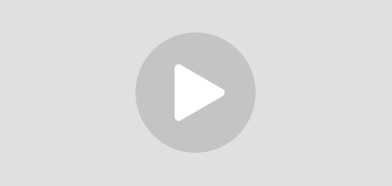
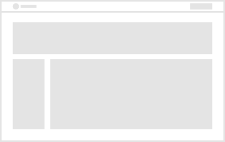
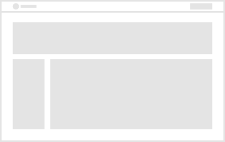

In [288]:
ur_ = "state.gov"
d = requests.get(f"{base_url}{ur_}")
d.text

In [310]:
 soup.findAll("li")

[<li class="list-inline__item">
 <a aria-label="go to Login" class="header__actions__link header__actions__link--login list-inline__link" href="https://www.sitejabber.com/login">Login</a> </li>,
 <li class="list-inline__item">
 <a aria-label="go to Signup" class="header__actions__link header__actions__link--register list-inline__link" href="https://www.sitejabber.com/registration">Signup</a> </li>,
 <li class="list-inline__item">
 <a aria-label="go to Login" class="header__actions__link header__actions__link--login list-inline__link" href="https://www.sitejabber.com/login">Login</a> </li>,
 <li class="list-inline__item">
 <a aria-label="go to Signup" class="header__actions__link header__actions__link--register list-inline__link" href="https://www.sitejabber.com/registration">Signup</a> </li>,
 <li class="header__bottom__nav__item nav__item dropdown dropdown-nav">
 <a class="header__bottom__nav__item__link nav__item__link dropdown-toggle" href="/categories">Browse Businesses</a> <ul cla

<!DOCTYPE 
